In [1]:
import pickle
import numpy as np
import pandas as pd
from msresist.validations import preprocess_ebdt_mcf7
from msresist.clustering import MassSpecClustering

In [2]:
x = preprocess_ebdt_mcf7()
d = x.select_dtypes(include=['float64']).T
i = x.select_dtypes(include=['object'])

Load model

In [3]:
with open('msresist/data/pickled_models/ebdt_mcf7_pam250_CL12_W5', 'rb') as f:
    pam_model = pickle.load(f)[0]

Find centers

In [6]:
centers = pd.DataFrame(pam_model.transform())
centers.columns = np.arange(pam_model.ncl) + 1
centers.insert(0, "Sample", x.columns[3:])
centers["Sample"] = [s.split(".")[1].split(".")[0]  for s in centers["Sample"]]

PCA

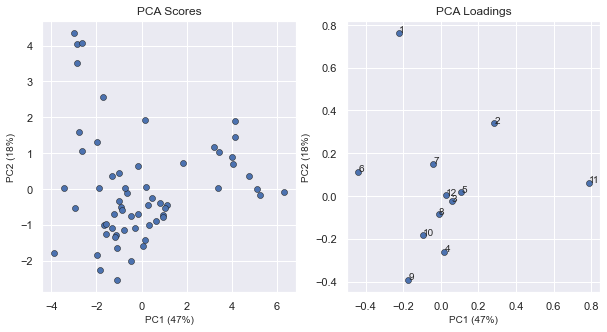

In [7]:
from msresist.figures.figure3 import plotPCA
import matplotlib.pyplot as plt

_, ax = plt.subplots(1, 2, figsize=(10, 5))

plotPCA(ax, centers, 2, ["Sample"], "Cluster")

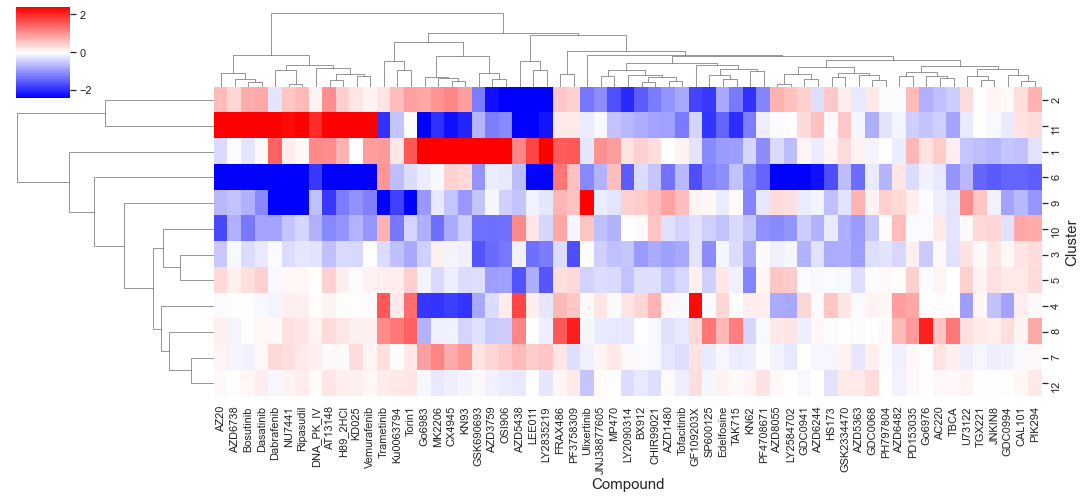

In [10]:
import seaborn as sns

def plotClustergram(data, title="", lim=False, robust=True, xticklabels=False, yticklabels=False, ylabel="", xlabel="", figsize=(10, 10)):
    """ Clustergram plot. """
    g = sns.clustermap(data, method="complete", cmap="bwr", robust=robust, vmax=lim, vmin=-lim, figsize=figsize, xticklabels=xticklabels, yticklabels=yticklabels)
    g.fig.suptitle(title, fontsize=17)
    ax = g.ax_heatmap
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xlabel(xlabel, fontsize=15)
    return g

d = centers.set_index("Sample")
g = plotClustergram(d.T, lim=max(abs(d)) * 0.2, xticklabels=True, yticklabels=True, ylabel="Cluster", xlabel="Compound", figsize=(15, 7))


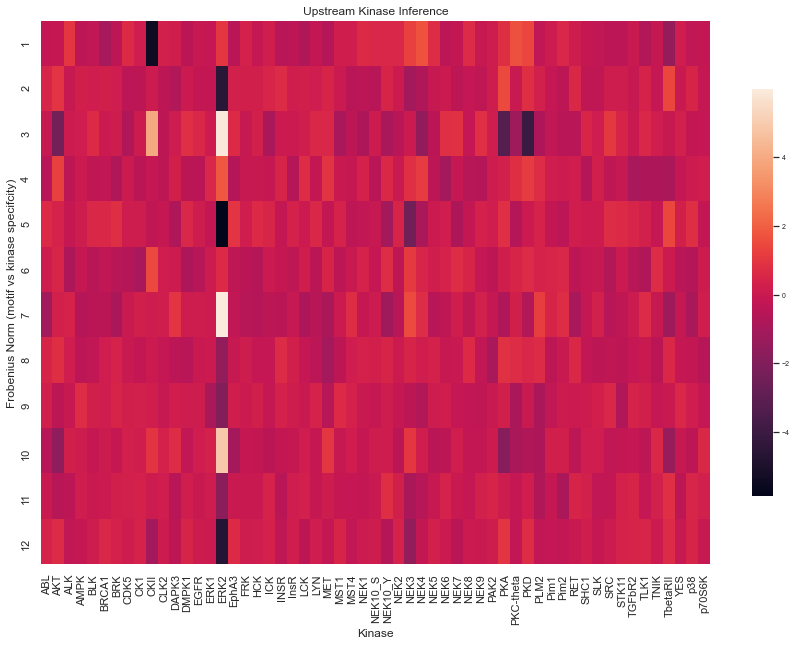

In [9]:
from msresist.figures.figure3 import plotUpstreamKinase_heatmap, plotMotifs

_, ax = plt.subplots(1, 1, figsize=(15, 10))
plotUpstreamKinase_heatmap(pam_model, list(np.arange(pam_model.ncl) + 1), ax)